# Assignment-1

# Data Visualization with Haberman Dataset


**SOURCE**: https://www.kaggle.com/gilsousa/habermans-survival-data-set

**ABOUT**: This dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**FEATURES**: age, year, nodes

**CLASS LABEL**: status

**Attributes/Features Information**:
- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)

- Survival status (class attribute): 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

**OBJECTIVE**: Given a new patient's data, find his survival status 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np 

In [6]:
haberman = pd.read_csv('haberman.csv')
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
#How many data points and features?
print("\nShape of data set:",haberman.shape)
print("Number of data points:",haberman.shape[0])
print("Number of features:",haberman.shape[1]-1)


Shape of data set: (306, 4)
Number of data points: 306
Number of features: 3


In [10]:
#How many data points for each class are present?
print("Class labels:",haberman['status'].unique())
print("Number of classes:",len(haberman['status'].unique()))
print("\nCount of each class:\n",haberman['status'].value_counts())
#haberman is an imbalanced dataset because the number of data points for class 1 is almost 3 times class 2 

Class labels: [1 2]
Number of classes: 2

Count of each class:
 1    225
2     81
Name: status, dtype: int64


In [11]:
#changing dtype of class label column to string for easier visualization
print("Before changing last column to string:\n",haberman.dtypes)
haberman['status'] = haberman['status'].astype(str)
print("\nAfter changing last column to string:\n",haberman.dtypes)

Before changing last column to string:
 age       int64
year      int64
nodes     int64
status    int64
dtype: object

After changing last column to string:
 age        int64
year       int64
nodes      int64
status    object
dtype: object


## Bivariate Analysis

### 2D Scatter Plot

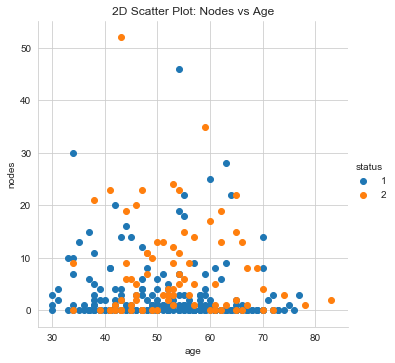

In [14]:
#nodes vs age
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue='status',height=5)\
   .map(plt.scatter,"age","nodes").add_legend()

plt.title("2D Scatter Plot: Nodes vs Age")
plt.show()

**Observations:**
1. Mostly patients' age is in the range of 40 to 60 years 
2. It is difficult to separate class 1 and 2 because most points overlap     (not linearly separable)
3. More the axillary lymph nodes, more the cancer has spread, so patients are more likely to die within 5 years, which can be seen from graph that class 2 data points are spread around the area with higher lymph nodes, and maximum of class 1 data points are spread around the area with lower count of lymph nodes 


### Pair Plots

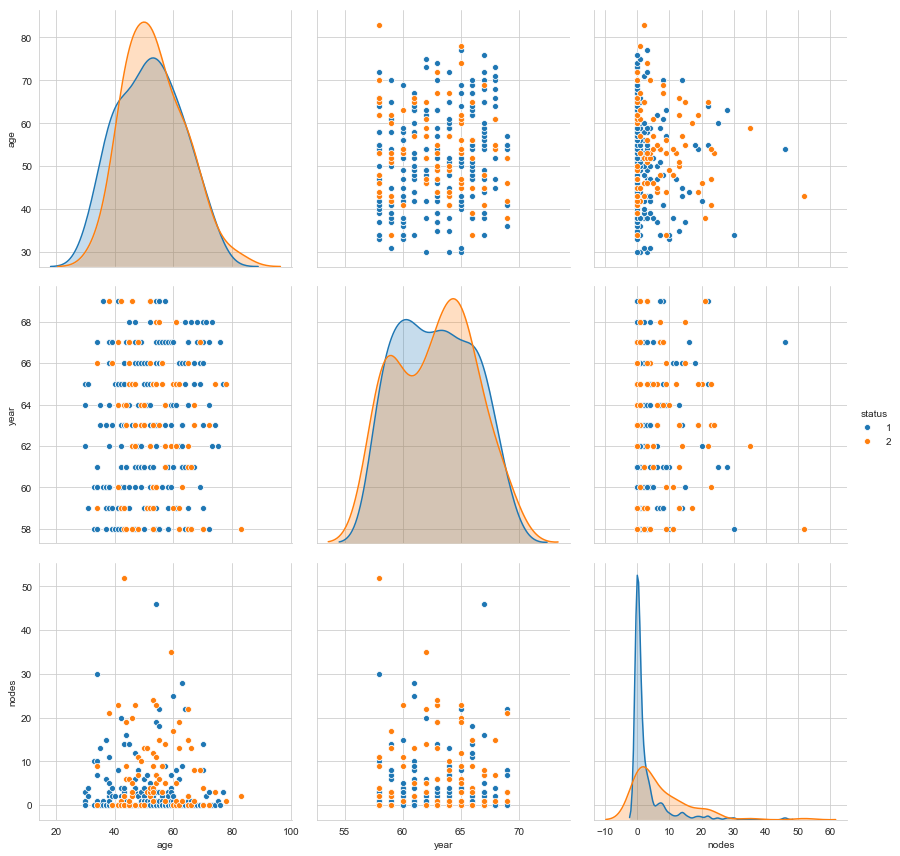

In [19]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue ="status", vars = ["age","year","nodes"],height=4)
plt.show()

**Observations**:
1. 3x3 matrix of plots are formed = 9
2. Plots at diagonal of matrix are PDFs (Probability Density Functions) of each feature

3. Using any of the 2D scatter plots, it is difficult to separate class 1 from class 2 i.e. they are not linearly separable because they overlap 
4. Pair plots are not very helpful for separation of classes 
5. From Nodes vs Year and Nodes vs Age plots, it can be seen that there were very few patients for whom the count of nodes went above 20 
6. From Nodes vs Year and Age vs Year plots, it can seen that more operations happened in the years from 1960 to 1970

7. Out of 3 features, nodes feature is more informative than others to be able to classify the patient into the given 2 classes

## Univariate Analysis

### 1D Scatter Plots

In [20]:
#data set only with data points corresponding to class 1
haberman_1 = haberman.loc[haberman["status"]=="1"]

#data set only with data points corresponding to class 2
haberman_2 = haberman.loc[haberman["status"]=="2"]

#### Age

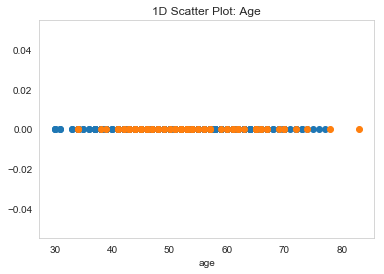

In [21]:
plt.plot(haberman_1["age"], np.zeros_like(haberman_1["age"]), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2["age"]), 'o')
plt.title("1D Scatter Plot: Age")
plt.xlabel("age")
plt.grid()
plt.show()

**Observations**:
1. Very difficult to know how many points are there
2. Patients' age, who survived (class 1), is varying from 30 to 77, but patients' age who died (class 2), is in the range of 40 to 70

#### Year

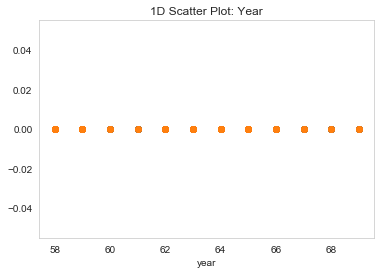

In [23]:
plt.plot(haberman_1["year"], np.zeros_like(haberman_1["year"]), 'o')
plt.plot(haberman_2["year"], np.zeros_like(haberman_2["year"]), 'o')
plt.title("1D Scatter Plot: Year")
plt.xlabel("year")
plt.grid()
plt.show()

**Observations**:
1. Data points of class 1 and class 2 exactly intersect with each othermaking them extremely difficult to separate

#### Nodes

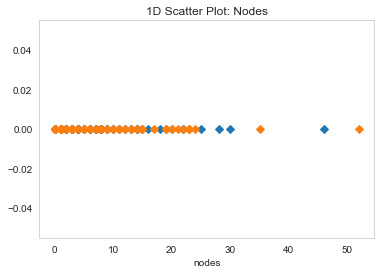

In [25]:
plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1["nodes"]), 'D')
plt.plot(haberman_2["nodes"], np.zeros_like(haberman_2["nodes"]), 'D')
plt.title("1D Scatter Plot: Nodes")
plt.xlabel("nodes")
plt.grid()
plt.show()

**Observations**:
1. Most data points lie below lymph nodes count of 25 

### Histograms / PDFs (Probability Density Functions)

#### Age

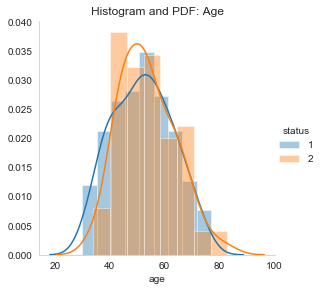

In [26]:
sns.FacetGrid(haberman, hue="status",height=4).map(sns.distplot,"age").add_legend()
plt.title("Histogram and PDF: Age")
plt.grid()
plt.show()

**Observations**:
1. Both the PDFs of class 1 and class 2 overlap so much that it is difficult to classify a new patient into any of the 2 classes depending on age
2. However, high peaks for both lie in the range 35-70

#### Year

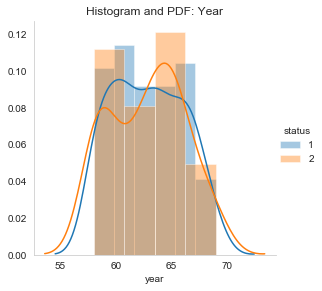

In [27]:
sns.FacetGrid(haberman, hue="status",height=4).map(sns.distplot,"year").add_legend()
plt.title("Histogram and PDF: Year")
plt.grid()
plt.show()

**Observations**:
1. Both the PDFs are similar to each other, and hence year of operation is not a significant factor to consider for classification purpose here 


#### Nodes

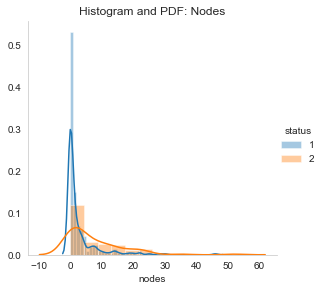

In [28]:
sns.FacetGrid(haberman, hue="status",height=4).map(sns.distplot,"nodes").add_legend()
plt.title("Histogram and PDF: Nodes")
plt.grid()
plt.show()

**Observations**:
1. Maximum frequency of class 1 and 2 lies in the range of 0 to 5 
2. Class 1 has a peak in the range 0-2 which means that most people who survived had positive axillary lymph nodes in the range 0-2 


### CDFs (Cummulative Density Functions)

#### Age

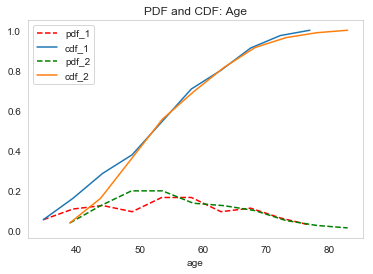

In [29]:
#Plot CDF of Class 1
counts, bin_edges = np.histogram(haberman_1['age'],bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'r--',label='pdf_1')
plt.plot(bin_edges[1:],cdf,label='cdf_1')

#Plot CDF of Class 2
counts, bin_edges = np.histogram(haberman_2['age'],bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'g--',label='pdf_2')
plt.plot(bin_edges[1:],cdf,label='cdf_2')

plt.grid()
plt.xlabel('age')
plt.title("PDF and CDF: Age")
plt.legend()
plt.show( )

**Observations**:
1. Patients with age less than 38 will survive after 5 years of operations i.e. they can be classified into class 1

#### Nodes

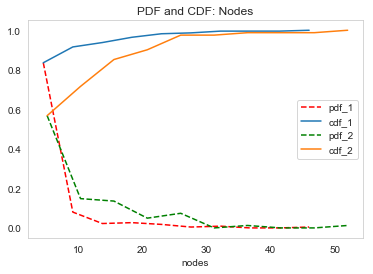

In [30]:
#Plot CDF of Class 1
counts, bin_edges = np.histogram(haberman_1['nodes'],bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'r--',label='pdf_1')
plt.plot(bin_edges[1:],cdf,label='cdf_1')


#Plot CDF of Class 2
counts, bin_edges = np.histogram(haberman_2['nodes'],bins=10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'g--',label='pdf_2')
plt.plot(bin_edges[1:],cdf,label='cdf_2')

plt.grid()
plt.xlabel('nodes')
plt.title("PDF and CDF: Nodes")
plt.legend()
plt.show( )

**Observations**:
1. Patients with positive axillary lymph nodes greater than 45 are likely to die after 5 years of operation i.e. can be categorized in class 2 

### Box Plots with Whiskers

#### Age

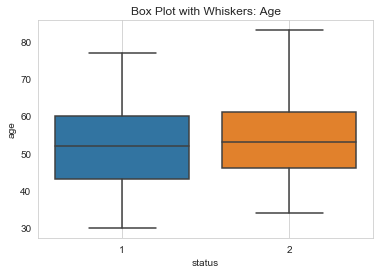

In [31]:
sns.boxplot(x='status',y='age',data=haberman)
plt.grid()
plt.title("Box Plot with Whiskers: Age")
plt.show()

**Observations**:
1. 50 percentile line of both classes match 
2. 25 percentile line of class 1 is below the same line of class 2 i.e. patients below the age of 45 are more likely to survive (class1) 

#### Year

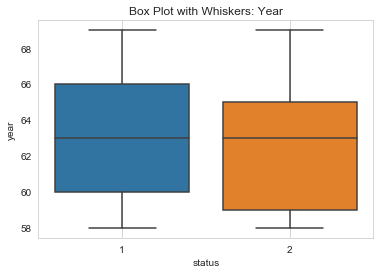

In [32]:
sns.boxplot(x='status',y='year',data=haberman)
plt.grid()
plt.title("Box Plot with Whiskers: Year")
plt.show()

**Observations**:
1. Most of the areas of box plots of class 1 and 2 overlap 
2. Patients with operation years 1959 and 1958 can be classified into class 2
3. Patients with operation years after 1963 can be classified into class 1 
4. These conclusions are just based on given data, however,any new patient's data cannot be classified into class 1 or 2 based on year unless we know some more information about breast cancer during those years

#### Nodes

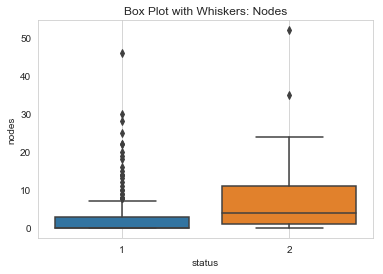

In [33]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.grid()
plt.title("Box Plot with Whiskers: Nodes")
plt.show()

**Observations**:
1. It can be clearly seen that there are many outliers for class 1 
2. Most patients who survived (75 percentile line) is below lymph node count of 5 i.e. below nodes count of 5, patients can be classified as class 1
3. 50 percentile line for class 2 is above lymph node count of 5 and for class 1, above 7 node count, the points are outliers, hence patients with lymph node count of 7 can be classified into class 2

### Violin Plots

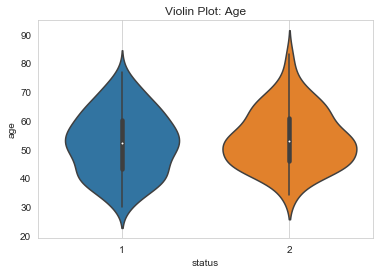

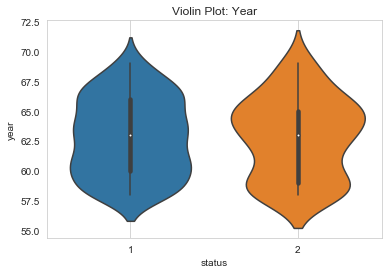

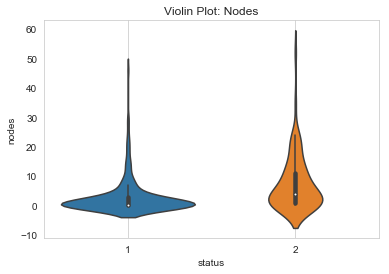

In [34]:
#age
sns.violinplot(x='status',y='age',data=haberman)
plt.grid()
plt.title("Violin Plot: Age")
plt.show()

#year
sns.violinplot(x='status',y='year',data=haberman)
plt.grid()
plt.title("Violin Plot: Year")
plt.show()

#nodes
sns.violinplot(x='status',y='nodes',data=haberman)
plt.grid()
plt.title("Violin Plot: Nodes")
plt.show()

**Observations**:
1. Violin Plots are a combination of PDFs and Box Plots 
2. Similar observations from individual PDF and Box Plots can be seen here 

### Final Conclusions:
1. The haberman data set is imbalanced with class 1 data being almost 3 times class 2 data 
2. The classes overlap so much for each feature that it is not linearly separable 
3. Simple if else conditions cannot be used here to separate classes of this data 
4. Only age and nodes feature give us some meaningful insights about the distribution of data 